### MNIST digit classifier

Code to train a neural network to classify MNIST digits

In [1]:
#Import modules
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import string
from tensorflow.keras.optimizers import RMSprop
from PIL import Image
from PIL import ImageOps

In [2]:
#Upload and prepare data
df_data = pd.read_csv('train.csv')

#Separate data into labels and image pixel values
df_labels = df_data[['label']]
df_images = df_data.drop(columns=['label'])

#Convert to arrays for use with TF
labels_array = df_labels.to_numpy()
images_array = df_images.to_numpy()

#Reshape image pixel array
images_array = images_array.reshape(images_array.shape[0], 28,28)

#Split data into training, validation and test sets (40000, 1000, 1000)
x_train = images_array[:40000]
y_train = labels_array[:40000]

x_val = images_array[40000:41000]
y_val = labels_array[40000:41000]

x_test = images_array[41000:]
y_test = labels_array[41000:]

#Define function to generate generators for training, validation and test data
def train_val_generators(training_images, training_labels, validation_images, validation_labels, test_images, test_labels):
    training_images = np.expand_dims(training_images, axis = -1)
    validation_images = np.expand_dims(validation_images, axis = -1)
    test_images = np.expand_dims(test_images, axis = -1)

    train_datagen = ImageDataGenerator(
      rescale = 1./255)

    train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)

    validation_datagen = ImageDataGenerator(rescale = 1./255)

    validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)

    test_datagen = ImageDataGenerator(rescale = 1./255)
    
    test_generator = test_datagen.flow(x = test_images,
                                      y = test_labels,
                                      batch_size=32)

    return train_generator, validation_generator, test_generator

#Call function to create generator instances
train_gen, val_gen, test_gen = train_val_generators(x_train, y_train, x_val, y_val, x_test, y_test)

In [3]:
#Verify shape of datasets
print(f"Images of training generator have shape: {train_gen.x.shape}")
print(f"Labels of training generator have shape: {train_gen.y.shape}")
print(f"Images of validation generator have shape: {val_gen.x.shape}")
print(f"Labels of validation generator have shape: {val_gen.y.shape}")
print(f"Images of test generator have shape: {test_gen.x.shape}")
print(f"Labels of test generator have shape: {test_gen.y.shape}")

Images of training generator have shape: (40000, 28, 28, 1)
Labels of training generator have shape: (40000, 1)
Images of validation generator have shape: (1000, 28, 28, 1)
Labels of validation generator have shape: (1000, 1)
Images of test generator have shape: (1000, 28, 28, 1)
Labels of test generator have shape: (1000, 1)


In [4]:
#Define function to create a sequential model with 2 convolutional layers & 2 max pooling layers
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])


    model.compile(optimizer = RMSprop(learning_rate = 0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [5]:
#Instantiate model
model = create_model()

# Train model
history = model.fit(train_gen,
                    epochs=10,
                    validation_data=val_gen)

2023-08-16 19:20:15.298201: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 19:20:15.299899: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train for 1250 steps, validate for 32 steps
Epoch 1/10
1250/1250 [==============================] - 107s 85ms/step - loss: 0.1282 - accuracy: 0.9601 - val_loss: 0.0721 - val_accuracy: 0.9750
Epoch 2/10
1250/1250 [==============================] - 107s 86ms/step - loss: 0.0435 - accuracy: 0.9868 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 3/10
1250/1250 [==============================] - 113s 90ms/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.0469 - val_accuracy: 0.9840
Epoch 4/10
1250/1250 [==============================] - 113s 90ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.0547 - val_accuracy: 0.9870
Epoch 5/10
1250/1250 [==============================] - 113s 90ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0479 - val_accuracy: 0.9880
Epoch 6/10
1250/1250 [==============================] - 112s 89ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.0464 - val_accuracy: 0.9880
Epoch 7/10
1250/1250 [==============================] - 117s 94ms/step - l

### Evaluate model

In [6]:
test_performance = model.evaluate(test_gen)
print(f'Test set accuracy: {test_performance[1]*100}')

32/32 [==============================] - 1s 44ms/step - loss: 0.0698 - accuracy: 0.9890
Test set accuracy: 98.90000224113464


### Give some examples of classifications

In [7]:
#Generate predictions
y_preds = model.predict(test_gen.x)

#Choose examples
examples = test_gen.x[:5]

#Determine classes of predictions (by default these are arrays of probabilities (max prob == predicted class))
a = []
for i in y_preds:
    b = np.argmax(i)
    a.append(b)

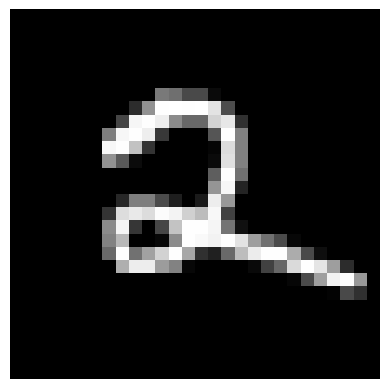

Label: 2
Prediction: 2


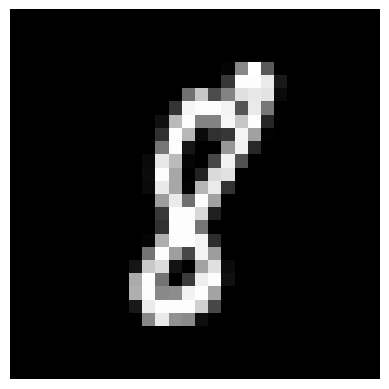

Label: 8
Prediction: 8


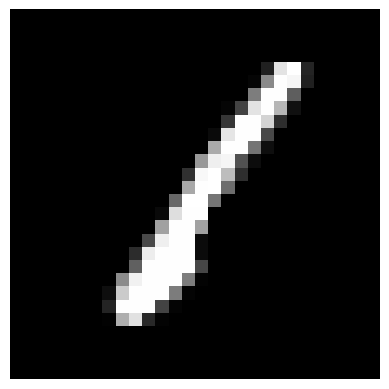

Label: 1
Prediction: 1


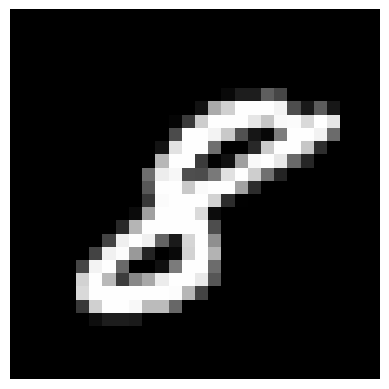

Label: 8
Prediction: 8


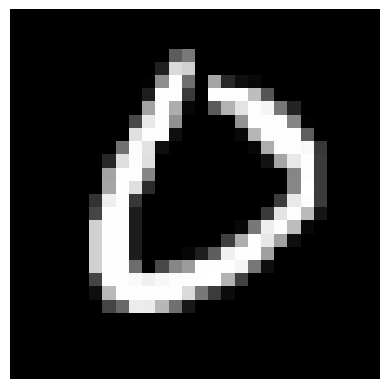

Label: 0
Prediction: 0


In [8]:
#Display examples
for i in range(len(examples)):
    image1 = np.squeeze(examples[i])
    plt.imshow(image1, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # To turn off axis numbers and ticks
    plt.show()
    print(f'Label: {test_gen.y[i][0]}')
    print(f'Prediction: {a[i]}')

### Demonstrate model usability with real-world example

Here I wrote a number on paper and took a photo, before processing the image and generating a classification.

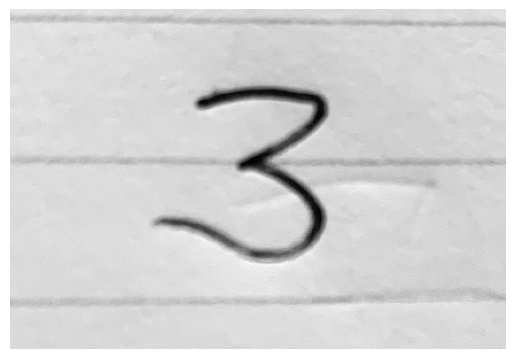

In [9]:
# Open the image and plot greyscale of original image
image_path = 'MNIST_model_eg_3.png'
image2 = Image.open(image_path)
image2 = image2.convert('L')
image2 = np.array(image2)
image2 = np.expand_dims(image2, axis = -1)
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
#Generate predictions for image
image_path = 'MNIST_model_eg_3.png'
image = Image.open(image_path)

# Resize the image to 28x28 pixels
image_resized = image.resize((28, 28))

# Convert the image to grayscale
image_gray = image_resized.convert('L')

#Invert colours because training set is white digits on black background
image_gray = ImageOps.invert(image_gray)

#Re-scale image
image_array = np.array(image_gray) / 255.0

#Expand image array dimensions
image_array = np.expand_dims(image_array, axis = -1)

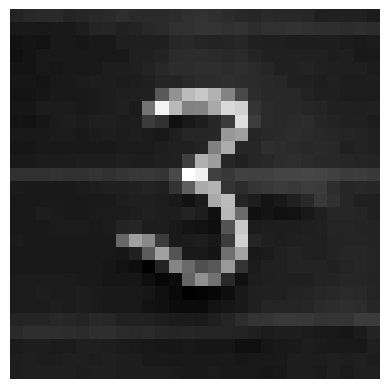

In [11]:
#Show processed image
plt.imshow(image_array, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # To turn off axis numbers and ticks
plt.show()

In [12]:
#Reshape image for model
image_array = image_array.reshape(1,28,28,1)

In [13]:
#Generate prediction from the model
class_prediction_rw_example = np.argmax(model.predict(image_array))
print(f'Predicted class: {class_prediction_rw_example}')

Predicted class: 3
